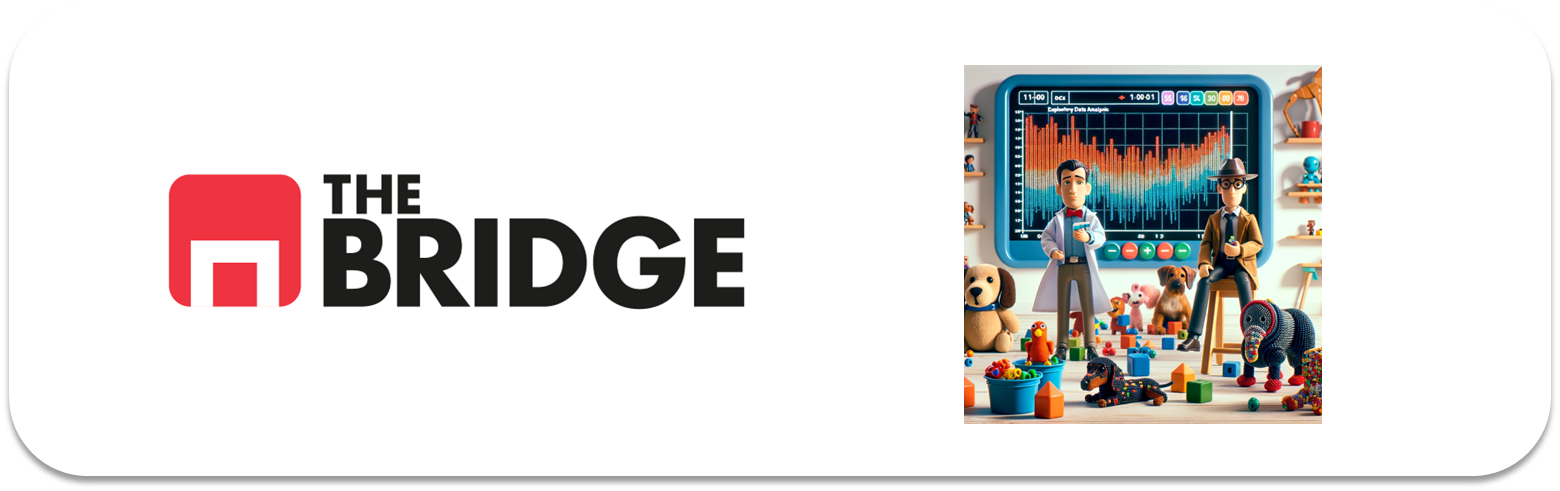

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df = pd.read_csv("./data/titanic.csv")
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df.drop(["deck","survived","pclass","embarked"], axis = 1, inplace = True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df["family_members"] = df["parch"] + df["sibsp"]
df.drop(["parch", "sibsp"], axis = 1, inplace = True)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode())

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
media_por_grupo = df.groupby("who")["age"].transform(func="mean")
for index in df[df["age"].isna()]["age"].index:
    df.loc[index,"age"] = media_por_grupo.loc[index]

del media_por_grupo

df["age"].isna().any()


np.False_

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [7]:
categoricas = df.select_dtypes(["object","category"])
numericas = df.select_dtypes("number")
binarias = df.select_dtypes("bool")

In [8]:
for categorica in categoricas.columns:
  print("Valores de la variable", categorica)
  print(categoricas[categorica].value_counts())
  print()
  print("Valores relativos")
  print(categoricas[categorica].value_counts(True))
  print()
  print("---------------------")
  print()

Valores de la variable sex
sex
male      577
female    314
Name: count, dtype: int64

Valores relativos
sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

---------------------

Valores de la variable class
class
Third     491
First     216
Second    184
Name: count, dtype: int64

Valores relativos
class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64

---------------------

Valores de la variable who
who
man      537
woman    271
child     83
Name: count, dtype: int64

Valores relativos
who
man      0.602694
woman    0.304153
child    0.093154
Name: proportion, dtype: float64

---------------------

Valores de la variable embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

Valores relativos
embark_town
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

---------------------

Valores de la variable alive
alive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


#### 1 - En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

Para comprobarlo, vamos a ver el número de personas que sobrevivieron por cada sexo incluyendo los niños:

In [10]:
#Valores absolutos
df.groupby("who")["alive"].value_counts()

who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64

In [11]:
#Valores relativos
df.groupby("who")["alive"].value_counts(True)

who    alive
child  yes      0.590361
       no       0.409639
man    no       0.836127
       yes      0.163873
woman  yes      0.756458
       no       0.243542
Name: proportion, dtype: float64

<Axes: xlabel='who', ylabel='count'>

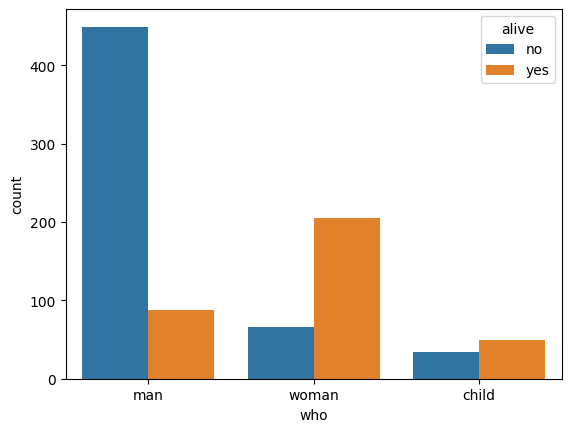

In [12]:
#Representación gráfica
sns.countplot(data = df, x = "who", hue = "alive")

Se puede observar que tanto en términos relativos como absolutos, sobrevieron más mujeres. También en términos relativos, sobrevivieron más niños que hombres

#### 2 - En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?


In [13]:
#Valores absolutos
df.groupby("class")["alive"].value_counts().sort_index(level=0, ascending=True)

class   alive
First   no        80
        yes      136
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64

In [14]:
#Valores relativos
df.groupby("class")["alive"].value_counts(True).sort_index(level=0, ascending=True)

class   alive
First   no       0.370370
        yes      0.629630
Second  no       0.527174
        yes      0.472826
Third   no       0.757637
        yes      0.242363
Name: proportion, dtype: float64

<Axes: xlabel='class', ylabel='count'>

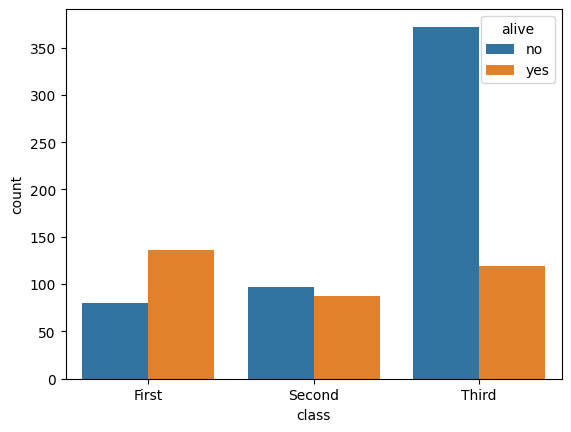

In [15]:
sns.countplot(data = df, x = "class", hue = "alive", order=["First", "Second", "Third"])

De lo anterior, se puede ver que pertenecer a una clase superior aumenta la posibilidad de sobrevivir

#### 3 - ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [16]:
#Valores absolutos
df.groupby("embark_town")["alive"].value_counts().sort_index(level=0, ascending=True)

embark_town  alive
Cherbourg    no        75
             yes       93
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      217
Name: count, dtype: int64

In [17]:
#Valores relativos
df.groupby("embark_town")["alive"].value_counts(True).sort_index(level=0, ascending=True)

embark_town  alive
Cherbourg    no       0.446429
             yes      0.553571
Queenstown   no       0.610390
             yes      0.389610
Southampton  no       0.663043
             yes      0.336957
Name: proportion, dtype: float64

<Axes: xlabel='embark_town', ylabel='count'>

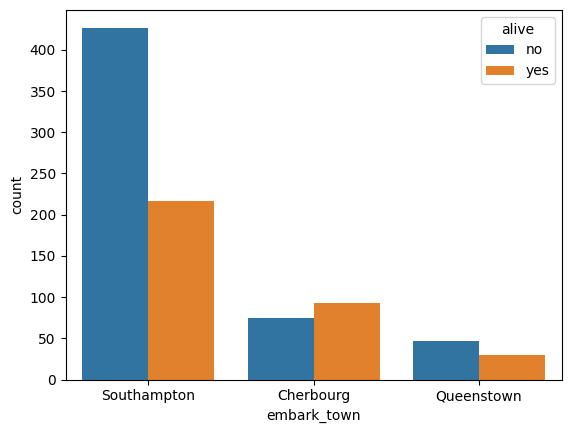

In [18]:
sns.countplot(data = df, x = "embark_town", hue = "alive")

<Axes: xlabel='embark_town', ylabel='count'>

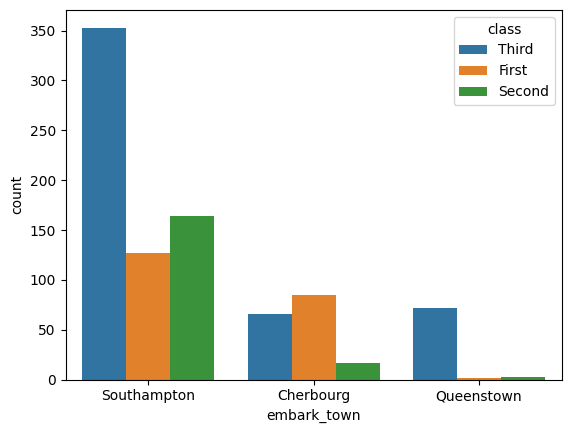

In [19]:
sns.countplot(data = df, x = "embark_town", hue = "class")

Se puede ver que, de forma relativa, es más probable sobrevivir si se embarcaba en Cherbourg. Esto es porque en Cherbourg embarcaba, también de forma relativa, más gente de primera clase que en las otras dos ciudades. Recordamos del apartado anterior que la gente de primera clase era la que más probabilidades tenía de sobrevivir.

#### 4 - ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

<Axes: xlabel='None', ylabel='fare'>

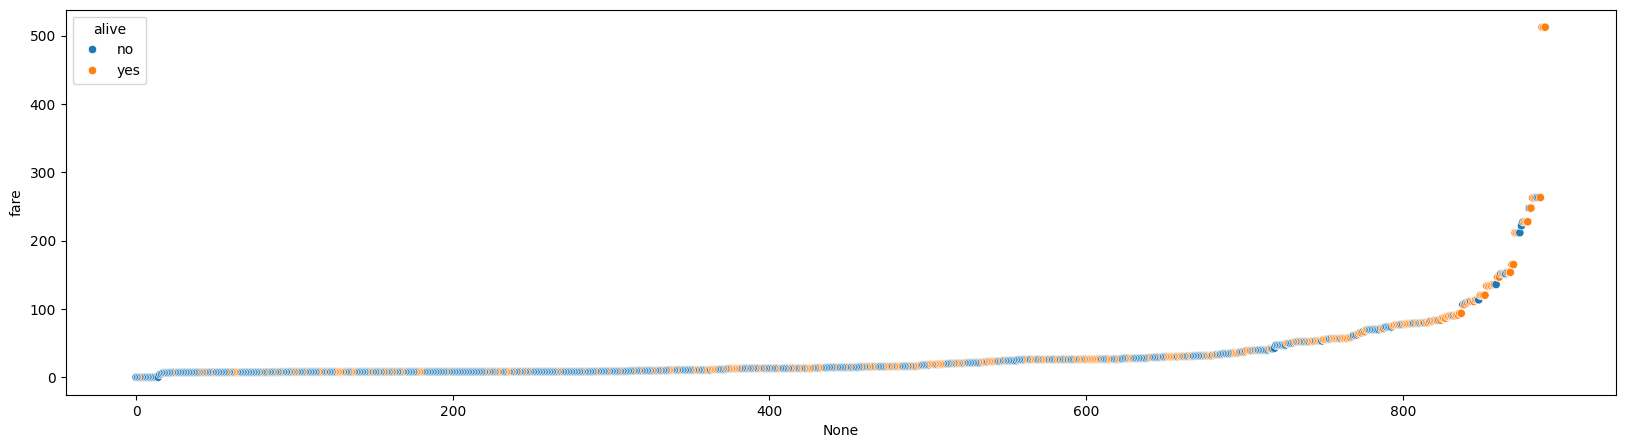

In [20]:
import numpy as np
df_fare_sorted = df[["fare","alive"]].sort_values(by="fare").reset_index(drop=True)
plt.figure(figsize=(20,5))
sns.scatterplot(data=df_fare_sorted, x=df_fare_sorted.index, y="fare", hue = "alive")

<Axes: xlabel='alive', ylabel='fare'>

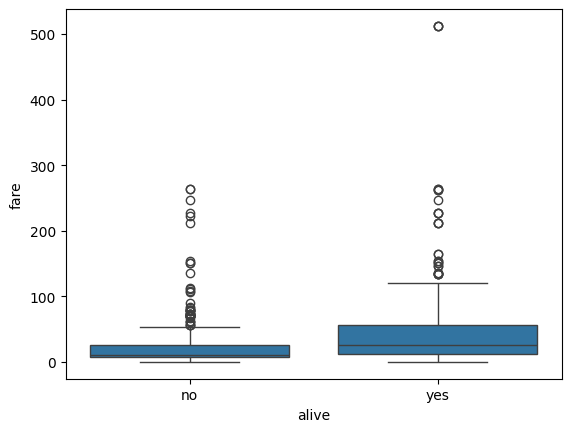

In [21]:
sns.boxplot(data=df, x = "alive", y = "fare")

De los gráficos anteriores, vemos que la tarifa en promedio es más alta para la gente que sobrevivió, así como su extensión hacia precios más altos.

#### 5- Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

Hay pasajeros que pudieron ser trabajadores y no pagaron y otros que directamente se colaron sin pagar. Del gráfico de dispersión del apartado anterior, se puede ver que la persona que más pagó, sobrevivió.

#### 6 -  Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

Sí hay relación. Lo hemos visto con los gráficos del apartado 4

#### 7 - Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [22]:
df.groupby(["class","who"])["alive"].value_counts(True)

class   who    alive
First   child  yes      0.833333
               no       0.166667
        man    no       0.647059
               yes      0.352941
        woman  yes      0.978022
               no       0.021978
Second  child  yes      1.000000
        man    no       0.919192
               yes      0.080808
        woman  yes      0.909091
               no       0.090909
Third   child  no       0.568966
               yes      0.431034
        man    no       0.880878
               yes      0.119122
        woman  no       0.508772
               yes      0.491228
Name: proportion, dtype: float64

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [23]:
df = pd.read_csv("./data/dataset_viajes_jun23.csv")
df

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


<Axes: xlabel='aircompany', ylabel='id_vuelo'>

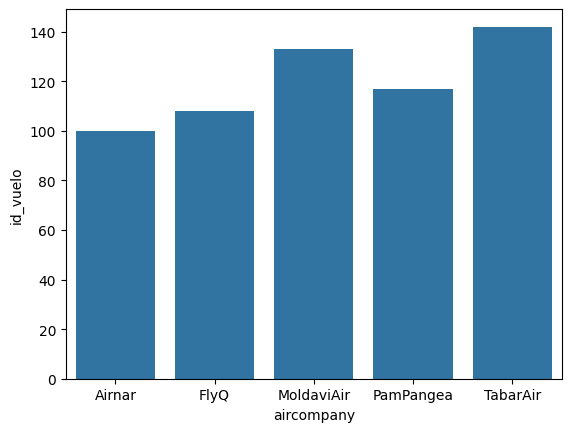

In [27]:
sns.barplot(df.groupby("aircompany")["id_vuelo"].count())

<Axes: xlabel='aircompany', ylabel='ingresos'>

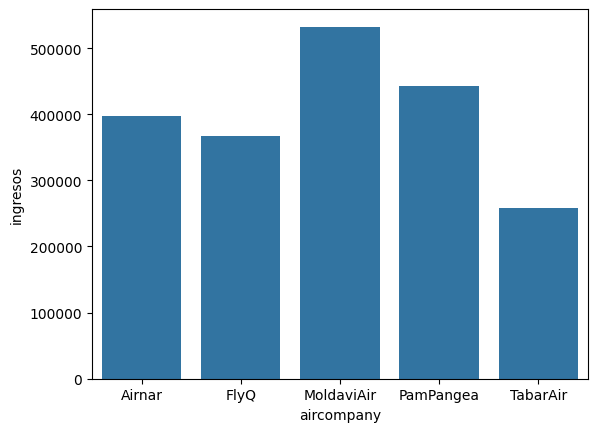

In [25]:
sns.barplot(df.groupby("aircompany")["ingresos"].median())

Lo que surgió en el ejercicio fue que pareció curioso el hecho de que TabarAir es la compañia que más vuelos realiza pero la que menos ingresa

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

<Axes: xlabel='consumo_kg', ylabel='distancia'>

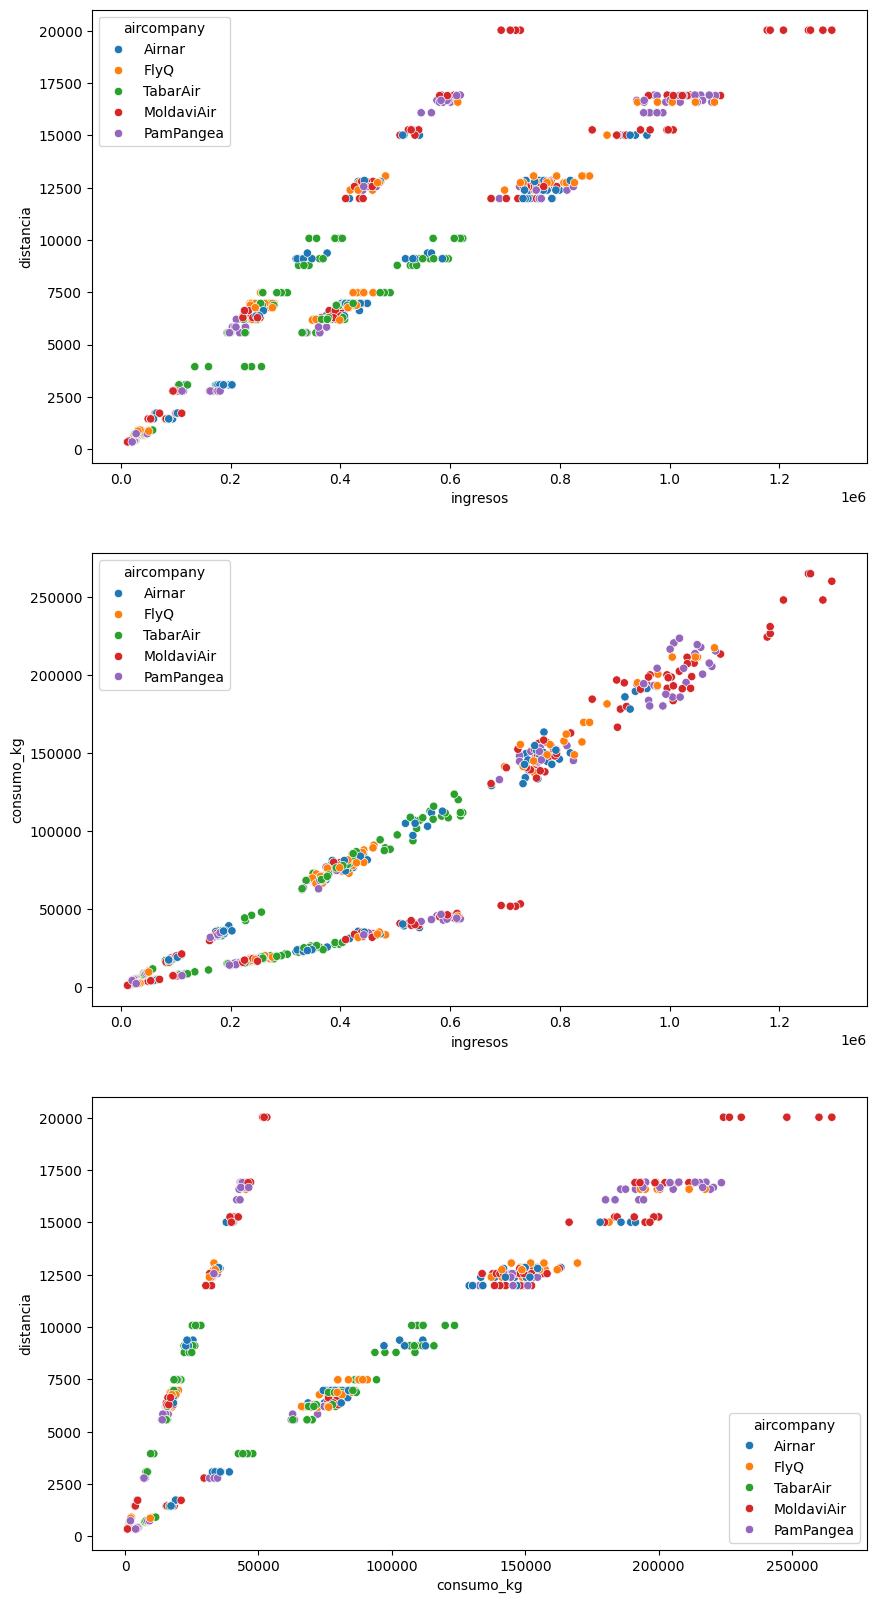

In [31]:
fig, ax = plt.subplots(3,1,figsize = (10,20))

sns.scatterplot(data=df, x = "ingresos", y = "distancia", hue = "aircompany", ax=ax[0])
sns.scatterplot(data=df, x = "ingresos", y = "consumo_kg", hue = "aircompany", ax=ax[1])
sns.scatterplot(data=df, x = "consumo_kg", y = "distancia", hue = "aircompany", ax=ax[2])

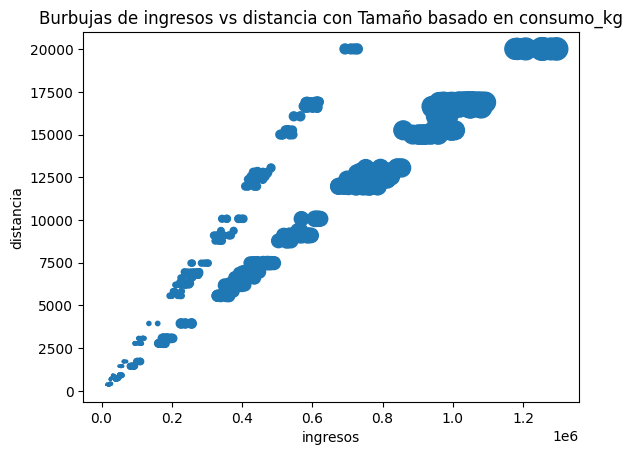

In [ ]:
def bubble_plot(df, col_x, col_y, col_size, scale = 1000):
    """
    Crea un scatter plot usando dos columnas para los ejes X e Y,
    y una tercera columna para determinar el tamaño de los puntos.

    Args:
    df (pd.DataFrame): DataFrame de pandas.
    col_x (str): Nombre de la columna para el eje X.
    col_y (str): Nombre de la columna para el eje Y.
    col_size (str): Nombre de la columna para determinar el tamaño de los puntos.
    """

    # Asegúrate de que los valores de tamaño sean positivos
    sizes = (df[col_size] - df[col_size].min() + 1)/scale

    plt.scatter(df[col_x], df[col_y], s=sizes)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Burbujas de {col_x} vs {col_y} con Tamaño basado en {col_size}')
    plt.show()

bubble_plot(df=df,col_x="ingresos", col_y="distancia", col_size="consumo_kg",scale=1000)

De lo anterior se puede observar dos lineas que separan. Esto representa que hay dos tipos de aviones que consumen de forma distinta. Tambien se observa que los ingresos aumentan con la distancia, al igual que el consumo. Mientras que las compañias en general tienen más vuelos en la zona de distancias más largas, estas ingresan más por vuelo. TabarAir centra sus vuelos en zona de media-baja distancia, por lo que sus ingresos por vuelo disminuyen

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [52]:
cat_vuelo = pd.cut(df["distancia"], bins = [0,1000,5000,15000,df["distancia"].max()], labels=["Corta", "Media", "Larga","Muy Larga"])
df["cat_vuelo"] = cat_vuelo
cat_vuelo

0      Corta
1      Larga
2      Larga
3      Larga
4      Larga
       ...  
595    Larga
596    Media
597    Larga
598    Larga
599    Larga
Name: distancia, Length: 600, dtype: category
Categories (4, object): ['Corta' < 'Media' < 'Larga' < 'Muy Larga']

<Axes: xlabel='ingresos', ylabel='consumo_kg'>

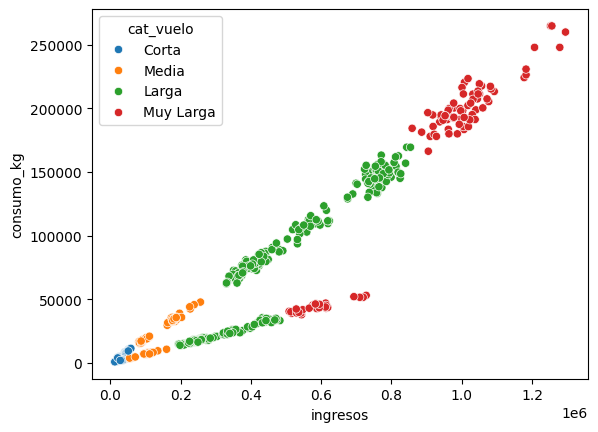

In [53]:
sns.scatterplot(data=df, x = "ingresos", y = "consumo_kg", hue = "cat_vuelo")

In [58]:
df.groupby("cat_vuelo", observed=True)[["ingresos","consumo_kg"]].mean()

,ingresos,consumo_kg
cat_vuelo,,
Corta,30884.060319,4389.192281
Media,123565.510366,18822.591410
Larga,458060.910189,72916.414194
Muy Larga,873230.829623,149064.679445


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.